<a href="https://colab.research.google.com/github/omkar123katare/Capstone_4_Online_Retail_Customer_Segmentation/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Identify major customer segments on a transnational data set. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

#**Importing Libraries**

---





### importing required libraries for dataframe and visualization

In [392]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import scipy
import scipy.stats as stat
import math
import sklearn

### importing plotly library for visualizations and choropleth map plots

In [295]:
!pip install plotly --upgrade
import plotly.graph_objs as go
import plotly
import plotly.graph_objs as go 
import plotly.offline as offline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### importing required libraries for clustering

In [296]:

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import plotly.express as px
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


### importing libraries required for Hierarchical clustering

In [297]:

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

#**Step 1 : Data Exploration**

In [298]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [408]:
# reading data from drive
df_original=pd.read_excel('/content/drive/MyDrive/Data Science Projects-AlmaBetter/Online Retail.xlsx')

In [409]:
transaction_data=df_original.copy()

In [410]:
# Shape of our dataset
transaction_data.shape

(541909, 8)

In [411]:
# First 5 rows of our data
transaction_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [412]:
# Last 5 rows of our data
transaction_data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [413]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [414]:
# Total number of null values in the dataset
transaction_data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

###**Obseravations-**
1.  'Description' column has 1454 Null values
2.  'CustomerID' column has 135080 Null values

In [415]:
transaction_data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


###**Observations-**


1.   Quantity column 
*   Average quantity ordered considering all the transactions is 9.55
*   Minimum quantity ordered is -80995. Quantity ordered cannot be negative. This could be an issue of potential data reversal. Further investigation is required to understand the data and manage the data reversal.
*   For 75% of the transactions quantity ordered is less than 10.
*   Maximum QUantity ordered is 80995.


---



2.   UnitPrice column
*   Average Unit price for each type of product is 96.76 sterling.
*   minimum price recorded is -11062.06. Price cannot be negative. This could be representing cancellation of orders.
*   75% transactions have Unitprice below 4.13 sterling.
*   Maximum unit price value is 38970 sterling.

---





3.   CusotmerID
*   In total for 406829 transactions, we have CustomerIDs recorded in our records






In [416]:
# Datatypes of columns in the given data
for elem in transaction_data.columns:
  print(f'Data type of column {elem} in the transactions dataframe is {transaction_data[elem].dtypes}.')

Data type of column InvoiceNo in the transactions dataframe is object.
Data type of column StockCode in the transactions dataframe is object.
Data type of column Description in the transactions dataframe is object.
Data type of column Quantity in the transactions dataframe is int64.
Data type of column InvoiceDate in the transactions dataframe is datetime64[ns].
Data type of column UnitPrice in the transactions dataframe is float64.
Data type of column CustomerID in the transactions dataframe is float64.
Data type of column Country in the transactions dataframe is object.


#**Exploring Data**

In [417]:
# Number of unique elements in different columns of given dataset
features=[]
unique_count_=[]
for elem in transaction_data.columns:
  print (f'Column {elem} has {transaction_data[elem].nunique()} number of unique elements.')
  unique_count_.append(transaction_data[elem].nunique())
  features.append(elem)

Column InvoiceNo has 25900 number of unique elements.
Column StockCode has 4070 number of unique elements.
Column Description has 4223 number of unique elements.
Column Quantity has 722 number of unique elements.
Column InvoiceDate has 23260 number of unique elements.
Column UnitPrice has 1630 number of unique elements.
Column CustomerID has 4372 number of unique elements.
Column Country has 38 number of unique elements.


In [418]:
features_arr=np.array(features)
unique_count_arr=np.array(unique_count_)

In [419]:
unique_df=pd.DataFrame()
unique_df['feature']=features_arr
unique_df['unique_feature_count']=unique_count_arr
unique_df.head()

,feature,unique_feature_count
0,InvoiceNo,25900
1,StockCode,4070
2,Description,4223
3,Quantity,722
4,InvoiceDate,23260


In [420]:
fig0 = px.bar(unique_df, x='feature', y='unique_feature_count',text_auto='.2s')
fig0.show()

###**Observations-**
1. We have customers from 38 different countries
2. Our database has data of 4372 unique customers
3. Seller has sold 4070 different types of products


### Exploring UnitPrice column

In [308]:
# Unique values in the Unit price column
transaction_data['UnitPrice'].unique()

array([   2.55,    3.39,    2.75, ...,  933.17, 1714.17,  224.69])

In [309]:
unit_price_array=np.sort(transaction_data['UnitPrice'].unique())

In [310]:
unit_price_=pd.DataFrame(unit_price_array,columns=['Unit_price'])

In [311]:
fig = px.scatter(x=range(len(unit_price_)), y=unit_price_array)
fig.show()

In [312]:
fig = px.box(unit_price_, y="Unit_price",points="all")
fig.show()


###**Observations-**
 1.  Here it can be observed that a few high values are present in the Unit_price column. To decide whether these are outliers, further investigation is required to be done ( like noting the values in the qualtity column and also by noting previous buying behaviour of these customers.)
 2.  Quarter 1(25 percentile) to Quarter 3(75 percentile) value range is from 8.47 to 229.7

In [313]:
# Unique values in the Quantity column
transaction_data['Quantity'].unique()

array([     6,      8,      2,     32,      3,      4,     24,     12,
           48,     18,     20,     36,     80,     64,     10,    120,
           96,     23,      5,      1,     -1,     50,     40,    100,
          192,    432,    144,    288,    -12,    -24,     16,      9,
          128,     25,     30,     28,      7,     56,     72,    200,
          600,    480,     -6,     14,     -2,     11,     33,     13,
           -4,     -5,     -7,     -3,     70,    252,     60,    216,
          384,    -10,     27,     15,     22,     19,     17,     21,
           34,     47,    108,     52,  -9360,    -38,     75,    270,
           42,    240,     90,    320,   1824,    204,     69,    -36,
         -192,   -144,    160,   2880,   1400,     39,    -48,    -50,
           26,   1440,     31,     82,     78,     97,     98,     35,
           57,    -20,    110,    -22,    -30,    -70,   -130,    -80,
         -120,    -40,    -25,    -14,    -15,    -69,   -140,   -320,
      

In [314]:
Quantity_array=np.sort(transaction_data['Quantity'].unique())

In [315]:
Quantity_=pd.DataFrame(Quantity_array,columns=['Quantity_ordered'])

In [316]:
fig = px.scatter(x=range(len(Quantity_array)), y=Quantity_array)
fig.show()

In [317]:
fig = px.box(Quantity_, y="Quantity_ordered",points="all")
fig.show()

###**Observations-**
 1.  Here it can be observed that a few  values having very high and very low values are present in the Quantity_ordered column. To decide whether these are outliers, further investigation is required to be done ( like understanding issue of reverse entries also we need to understand previous buying behaviour of these customers)
 2.  Quarter 1(25 percentile) to Quarter 3(75 percentile) value range is from 8.47 to 229.7

In [318]:
# Unique values in the country column
transaction_data['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

#**Data Cleaning**

###**Dropping Duplicates**

In [319]:
print(f"Number of duplicate transactions :{transaction_data.duplicated().sum()}")

Duplicate transactions :5268


In [387]:
# Remove duplicates

print("Retail transactions before removing duplicates  : {}".format(transaction_data.shape[0]))
transaction_data = transaction_data.drop_duplicates()
print("Retail transactions after duplicates removal : {}".format(transaction_data.shape[0]))

Retail transactions before removing duplicates  : 401604
Retail transactions after duplicates removal : 401604


In [322]:
# Detect missing values
transaction_data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [323]:
# Descriptive statistics for StockCode.
transaction_data['StockCode'].describe()

count     536641
unique      4070
top       85123A
freq        2301
Name: StockCode, dtype: object

There are 4070 unique prodict codes. '85123A' is the most common product code appeared 2301 times.

In [324]:
# Descriptive statistics for Quantity.
transaction_data['Quantity'].describe()

count    536641.000000
mean          9.620029
std         219.130156
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

In [325]:
# Inspect min and max Quantity transactions
transaction_data.loc[(transaction_data['Quantity']==-80995) | (transaction_data['Quantity']==80995)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom


In [326]:
def find_negative(row):
  if row==np.nan:
    return np.nan
  elif row!=abs(row):
    return True
  else:
    return False

In [327]:
df2=transaction_data[transaction_data['Quantity'].apply(find_negative)]

In [328]:
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


Invoice No. 581483 of 80995 quantity sell of stock code 23843 is reversed by adding a contra entry. Invoice No. of such reversal/cancelled entries starts with letter 'C'

In [329]:
print(f"Number of cancelled transactions is ={transaction_data[transaction_data['InvoiceNo'].astype('str').str[0]=='C'].shape[0]}")

Number of cancelled transactions is =9251


In [330]:
# Descriptive statistics for UnitPrice
transaction_data['UnitPrice'].describe()

count    536641.000000
mean          4.632656
std          97.233118
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64

In [331]:
# Display transactions with negative unit price.
transaction_data[transaction_data['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


Above transactions are looking to be a manual ledger adjustments. Also they don't have customer id.

In [332]:
# Dsiplay transaction with unit price > 10000
transaction_data[transaction_data['UnitPrice'] > 10000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
15016,C537630,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:04:00,13541.33,NaN,United Kingdom
15017,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,NaN,United Kingdom
16232,C537644,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:34:00,13474.79,NaN,United Kingdom
16356,C537651,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:49:00,13541.33,NaN,United Kingdom
43702,C540117,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:55:00,16888.02,NaN,United Kingdom
43703,C540118,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:57:00,16453.71,NaN,United Kingdom
222681,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.00,15098.0,United Kingdom
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom
524601,C580604,AMAZONFEE,AMAZON FEE,-1,2011-12-05 11:35:00,11586.50,NaN,United Kingdom
524602,C580605,AMAZONFEE,AMAZON FEE,-1,2011-12-05 11:36:00,17836.46,NaN,United Kingdom


Most of the higher unit price transactions are related to Amazon fee for selling the product through their platform. Such transactions don't have customer id.

In [333]:
print("Transactions with zero unit price : {}".format(transaction_data[transaction_data['UnitPrice'] == 0].shape[0]))

Transactions with zero unit price : 2510


In [334]:
#First five transactions with zero unit price
transaction_data[transaction_data['UnitPrice'] == 0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom


In [335]:
# top 10 selling products by their counts in data set.
transaction_data['Description'].value_counts().sort_values(ascending=False)[:10]

WHITE HANGING HEART T-LIGHT HOLDER    2357
REGENCY CAKESTAND 3 TIER              2189
JUMBO BAG RED RETROSPOT               2156
PARTY BUNTING                         1720
LUNCH BAG RED RETROSPOT               1625
ASSORTED COLOUR BIRD ORNAMENT         1488
SET OF 3 CAKE TINS PANTRY DESIGN      1465
PACK OF 72 RETROSPOT CAKE CASES       1367
LUNCH BAG  BLACK SKULL.               1323
NATURAL SLATE HEART CHALKBOARD        1272
Name: Description, dtype: int64

In [336]:
# Descriptive Statistics for Country
transaction_data['Country'].describe()

count             536641
unique                38
top       United Kingdom
freq              490300
Name: Country, dtype: object

Majority of customers resides in United Kingdom

In [337]:
#Remove transactions with missing customer ids
transaction_data = transaction_data.drop(index=transaction_data[transaction_data['CustomerID'].isnull()].index)
print("Retail transactions after removing missing customer ids  : {}".format(transaction_data.shape[0]))

Retail transactions after removing missing customer ids  : 401604


Retail transactions after removing missing customer ids  : 401604

# **Now lets start Exploratory Data Analysis**

In [338]:
top_countries=pd.DataFrame(transaction_data['Country'].value_counts()).reset_index()

In [339]:
top_countries.head()

,index,Country
0,United Kingdom,356728
1,Germany,9480
2,France,8475
3,EIRE,7475
4,Spain,2528


In [340]:
top_countries.columns=['country','Number of transactions']
top_countries['Country_wise_contribution_to_no_of_transactions']=top_countries['Number of transactions']*100/top_countries['Number of transactions'].sum()
top_countries.head()

,country,Number of transactions,Country_wise_contribution_to_no_of_transactions
0,United Kingdom,356728,88.825809
1,Germany,9480,2.360534
2,France,8475,2.110288
3,EIRE,7475,1.861286
4,Spain,2528,0.629476


In [341]:
fig1=px.bar(top_countries[:10], x='country', y='Number of transactions', color='Number of transactions',height=400)
fig1.show()

In [342]:
# This is pre stored dataframe from plotly express library. We have imported this so as to match country names in our dataframe with their corresponding iso_alpha codes.
df = px.data.gapminder()

In [343]:
# Creating dataframe with corresponding iso_names for the countries. 
top_countries_with_iso_names=df.merge(top_countries,on='country',how="right")
top_countries_with_iso_names=top_countries_with_iso_names[['country','iso_alpha','Number of transactions']]

In [344]:
mapping1=px.choropleth(top_countries_with_iso_names,locations='iso_alpha',color='Number of transactions', hover_name="country")
mapping1.show()

In [345]:
transaction_data['Total_amount']=transaction_data['Quantity']*transaction_data['UnitPrice']
Country_wise_business=pd.DataFrame(transaction_data.groupby('Country')['Total_amount'].sum())
Country_wise_business.reset_index(inplace=True)
Country_wise_business.sort_values(by='Total_amount',ascending=False,inplace=True)
Country_wise_business.columns=['country','Total_amount']
Country_wise_business.head()

,country,Total_amount
35,United Kingdom,6747156.154
23,Netherlands,284661.540
10,EIRE,250001.780
14,Germany,221509.470
13,France,196626.050


In [346]:
fig2=px.bar(Country_wise_business[:10], x='country', y='Total_amount', color='Total_amount',height=400)
fig2.show()

In [347]:
# Creating dataframe with corresponding iso_names for the countries. 
top_countries_wrt_amount_with_iso_names=df.merge(Country_wise_business,on='country',how="right")
top_countries_wrt_amount_with_iso_names=top_countries_wrt_amount_with_iso_names[['country','iso_alpha','Total_amount']]

In [348]:
mapping2=px.choropleth(top_countries_wrt_amount_with_iso_names,locations='iso_alpha',color='Total_amount', hover_name="country")
mapping2.show()

In [349]:
Country_wise_business.sort_values(by='country',inplace=True)
top_countries.sort_values(by='country',inplace=True)
country_importance=Country_wise_business.merge(top_countries,on='country',how='left')
country_importance['importance']=country_importance['Total_amount']/country_importance['Number of transactions']

In [350]:
country_importance.sort_values(by='importance',ascending=False)[:10]

,country,Total_amount,Number of transactions,Country_wise_contribution_to_no_of_transactions,importance
23,Netherlands,284661.54,2371,0.590383,120.059696
0,Australia,137009.77,1258,0.313244,108.910787
19,Japan,35340.62,358,0.089143,98.716816
31,Sweden,36585.41,461,0.114790,79.360976
9,Denmark,18768.14,389,0.096862,48.247147
21,Lithuania,1661.06,35,0.008715,47.458857
29,Singapore,9120.39,229,0.057021,39.827031
20,Lebanon,1693.88,45,0.011205,37.641778
4,Brazil,1143.60,32,0.007968,35.737500
10,EIRE,250001.78,7475,1.861286,33.445054


In [351]:
fig3=px.bar(country_importance[:10], x='country', y='importance', color='importance',height=400)
fig3.show()

In [352]:
country_importance=country_importance[['country','importance']]
country_importance_plot=country_importance.merge(df,on='country',how='left')
country_importance_plot=country_importance_plot[['country','iso_alpha','importance']]

In [353]:
country_importance_plot.head()

,country,iso_alpha,importance
0,Australia,AUS,108.910787
1,Australia,AUS,108.910787
2,Australia,AUS,108.910787
3,Australia,AUS,108.910787
4,Australia,AUS,108.910787


In [354]:
mapping3=px.choropleth(country_importance_plot,locations='iso_alpha',color='importance', hover_name="country")
mapping3.show()

###**Observations-**
1. 94.5% of the transactions were with customers belonging to United Kingdom
2. We can observe that by number of transactions, bigger share of business is done United Kingdom.
3. With respect to total amount of transactions, as expected UK has the lrgest contribution.
4. But, Netherlands which is not in the top 5 countries wrt number transactions, is at the second spot with respect to total transaction amounts. Which suggests, we have sold products wigh high prices to Netherlands.
5. If we look at top 5 countries by the ratio of total amount of transactions and number of transactions, top 5 countries are Netherlands, Australia, Japan, Sweden, Denmark. As these are the most profitable countries, we need to focus on business of these countries. Surprisingly United Kingdom lies in the last 5 countries in importance category. even after contributing highest in sale volume.

In [355]:
import datetime as dt

transaction_data['InvoiceDate'] = pd.to_datetime(transaction_data['InvoiceDate'])
#transaction_data['SalesAmount'] = transaction_data['Quantity'] * transaction_data['UnitPrice']
transaction_data['Month'] = transaction_data['InvoiceDate'].dt.month
transaction_data['Day'] = transaction_data['InvoiceDate'].dt.day
transaction_data['Hour'] = transaction_data['InvoiceDate'].dt.hour

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



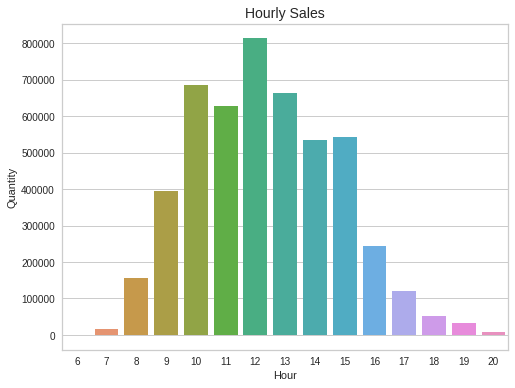

In [356]:
hourly_sales = transaction_data[['Hour', 'Quantity']].groupby('Hour').sum()
#hourly_sales.plot(kind='bar')
plt.figure(figsize=(8,6))
plt.title("Hourly Sales", fontsize=14)
sns.barplot(hourly_sales.index, hourly_sales['Quantity'])

The majority of the sales happens in between 10am to 3pm

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



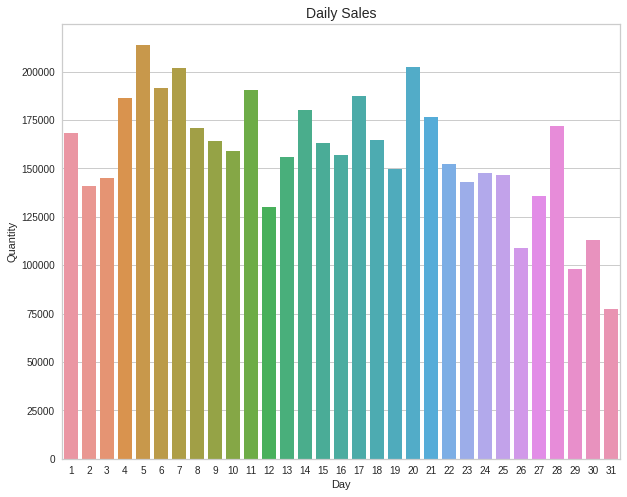

In [357]:
daily_sales = transaction_data[['Day', 'Quantity']].groupby('Day').sum()
plt.figure(figsize=(10,8))
plt.title("Daily Sales", fontsize=14)
sns.barplot(daily_sales.index, daily_sales['Quantity'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



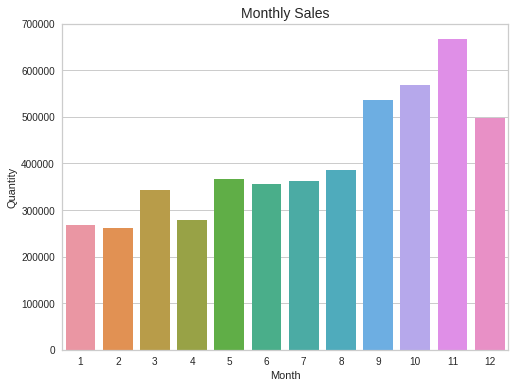

In [358]:
monthly_sales = transaction_data[['Month', 'Quantity']].groupby('Month').sum()
plt.figure(figsize=(8,6))
plt.title("Monthly Sales", fontsize=14)
sns.barplot(monthly_sales.index, monthly_sales['Quantity'])

Most of the sales happened in between September and December month (Christmas festive sales)

# Data Cleaning

Looking for outliers

In [362]:
transaction_data.dropna(inplace=True)

In [363]:
transaction_data['StockCode'] = transaction_data.StockCode.astype('category')

transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     401604 non-null  object        
 1   StockCode     401604 non-null  category      
 2   Description   401604 non-null  object        
 3   Quantity      401604 non-null  int64         
 4   InvoiceDate   401604 non-null  datetime64[ns]
 5   UnitPrice     401604 non-null  float64       
 6   CustomerID    401604 non-null  float64       
 7   Country       401604 non-null  object        
 8   Total_amount  401604 non-null  float64       
 9   Month         401604 non-null  int64         
 10  Day           401604 non-null  int64         
 11  Hour          401604 non-null  int64         
dtypes: category(1), datetime64[ns](1), float64(3), int64(4), object(3)
memory usage: 37.7+ MB


In [364]:
customer_distribution = transaction_data.groupby('InvoiceDate')['CustomerID'].count()

In [365]:
customer_distribution.head()

InvoiceDate
2010-12-01 08:26:00     7
2010-12-01 08:28:00     2
2010-12-01 08:34:00    16
2010-12-01 08:35:00     1
2010-12-01 08:45:00    20
Name: CustomerID, dtype: int64

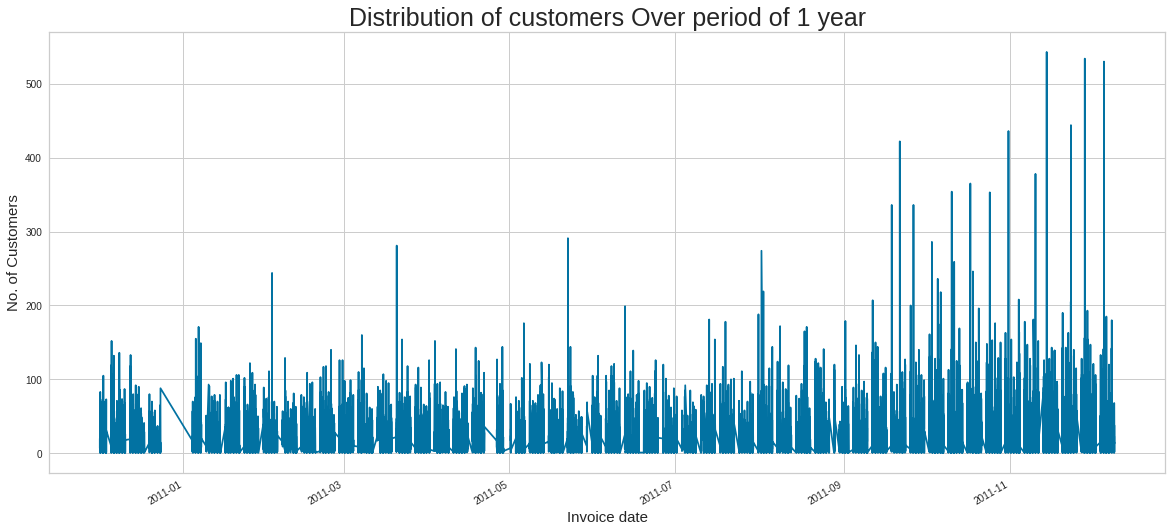

In [366]:
## customer distribution in 1 year time period
plt.figure(figsize=(20,9))
customer_distribution = transaction_data.groupby('InvoiceDate')['CustomerID'].count().plot()

## Set title and x, y labels
plt.title('Distribution of customers Over period of 1 year', size=25)
plt.xlabel('Invoice date', size=15)
plt.ylabel('No. of Customers', size=15)
plt.show()

In [367]:
# String to be searched in start of string 
search ="C"
  
# boolean series returned with False at place of NaN
bool_series = transaction_data["InvoiceNo"].str.startswith(search, na=False)
  
# displaying filtered dataframe
cancel_order = transaction_data[bool_series]

cancel_order.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_amount,Month,Day,Hour
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,-27.50,12,1,9
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,-4.65,12,1,9
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80,12,1,10
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,12,1,10
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,12,1,10


In [368]:
cancel_order_country = cancel_order.groupby('Country')['InvoiceNo'].count().reset_index()

In [369]:
cancel_order_country_top10 = cancel_order_country.sort_values('InvoiceNo',ascending=False, ignore_index=True).head(10)
cancel_order_country_top10

,Country,InvoiceNo
0,United Kingdom,7501
1,Germany,453
2,EIRE,247
3,France,148
4,USA,112
5,Australia,74
6,Spain,48
7,Italy,45
8,Belgium,38
9,Japan,37


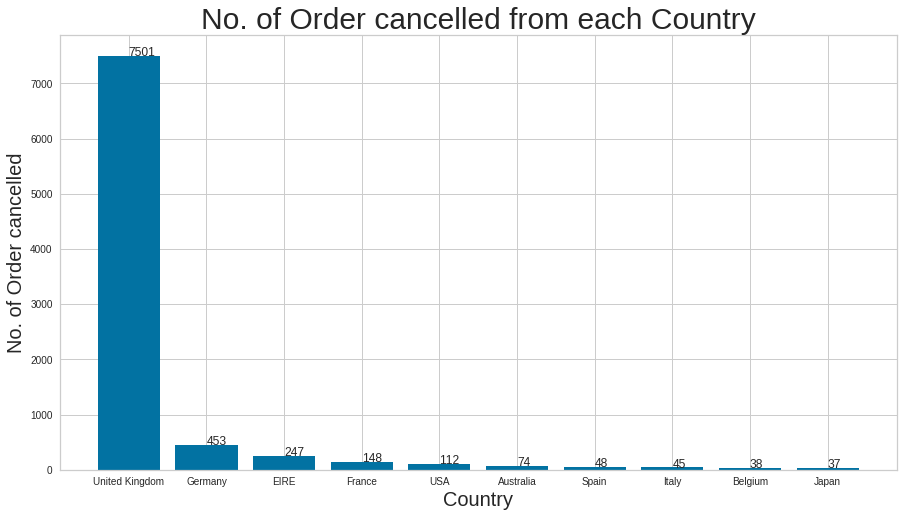

In [370]:
# Figure Size
plt.figure(figsize=(15,8))

## Define x and y axis
x=cancel_order_country_top10['Country']
y=cancel_order_country_top10['InvoiceNo']

# creating the bar plot
plt.bar(x,y)

## Function to set label
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

addlabels(x,y)

# set xlabel. ylabel and title
plt.xlabel("Country", size=20)
plt.ylabel("No. of Order cancelled", size=20)
plt.title("No. of Order cancelled from each Country", size=30)

## Showing the plot
plt.show()

In [371]:
## Apply groupby function on country and Invoice No.
country_count = transaction_data.groupby('Country')['InvoiceNo'].count().reset_index()

In [372]:
country_count.head()

,Country,InvoiceNo
0,Australia,1258
1,Austria,401
2,Bahrain,17
3,Belgium,2069
4,Brazil,32


In [373]:
## From country_count variable finding top 10 countries
Top_ten_country = country_count.sort_values('InvoiceNo', ascending=False, ignore_index=True).head(10)
Top_ten_country

,Country,InvoiceNo
0,United Kingdom,356728
1,Germany,9480
2,France,8475
3,EIRE,7475
4,Spain,2528
5,Netherlands,2371
6,Belgium,2069
7,Switzerland,1877
8,Portugal,1471
9,Australia,1258


In [374]:
## Adding country percentage column to top 10 countries data frame
Top_ten_country['Country_percent']= Top_ten_country['InvoiceNo']*100/transaction_data['InvoiceNo'].count()

In [375]:
Top_ten_country

,Country,InvoiceNo,Country_percent
0,United Kingdom,356728,88.825809
1,Germany,9480,2.360534
2,France,8475,2.110288
3,EIRE,7475,1.861286
4,Spain,2528,0.629476
5,Netherlands,2371,0.590383
6,Belgium,2069,0.515184
7,Switzerland,1877,0.467376
8,Portugal,1471,0.366281
9,Australia,1258,0.313244


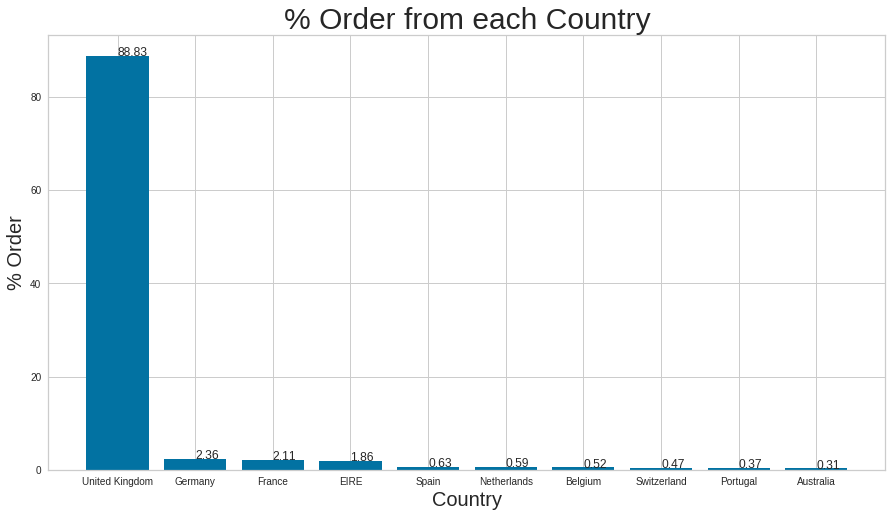

In [376]:
# Figure Size
plt.figure(figsize=(15,8))

## Define x and y axis
x=Top_ten_country['Country']
y=Top_ten_country['Country_percent']

# creating the bar plot
plt.bar(x,y)

## Function to set label
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

addlabels(x,round(y,2))

# set xlabel. ylabel and title
plt.xlabel("Country", size=20)
plt.ylabel("% Order", size=20)
plt.title("% Order from each Country", size=30)

## Showing the plot
plt.show()

In [377]:
#fig = plt.figure(figsize=(25, 7))
PercentSales = transaction_data.groupby(["CustomerID"])['UnitPrice'].sum().sort_values(ascending = False).iloc[:20].reset_index()
PercentSales.columns=['CustomerID','Amount']
PercentSales.head(10)

,CustomerID,Amount
0,14096.0,41376.33
1,15098.0,40278.90
2,14911.0,31025.29
3,12744.0,25108.89
4,16029.0,24101.56
5,17841.0,19956.37
6,12748.0,14698.31
7,12536.0,13255.22
8,12757.0,8012.79
9,15502.0,7836.84


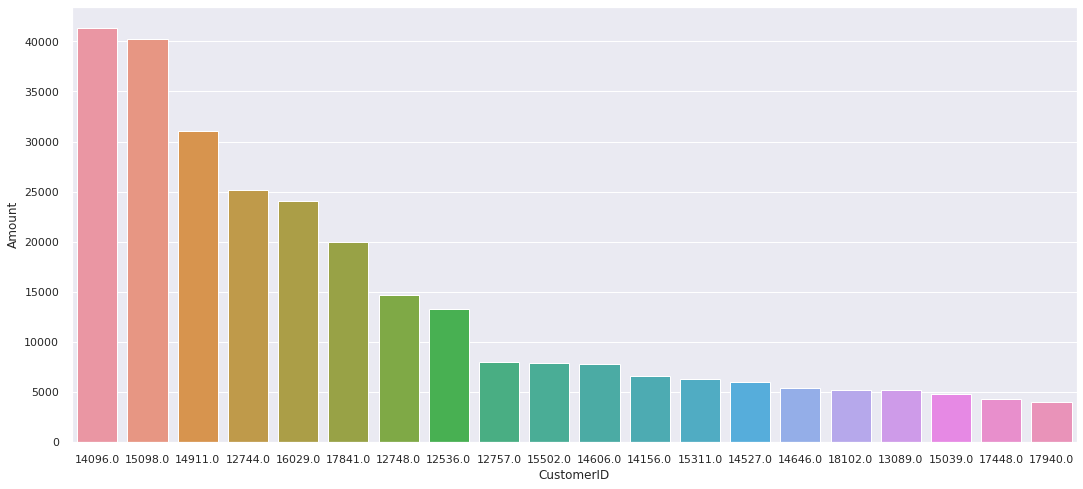

In [378]:

sns.set(rc={'figure.figsize':(18,8)})
sns.barplot(x="CustomerID", y="Amount", data=PercentSales, order=PercentSales['CustomerID'])
plt.show()

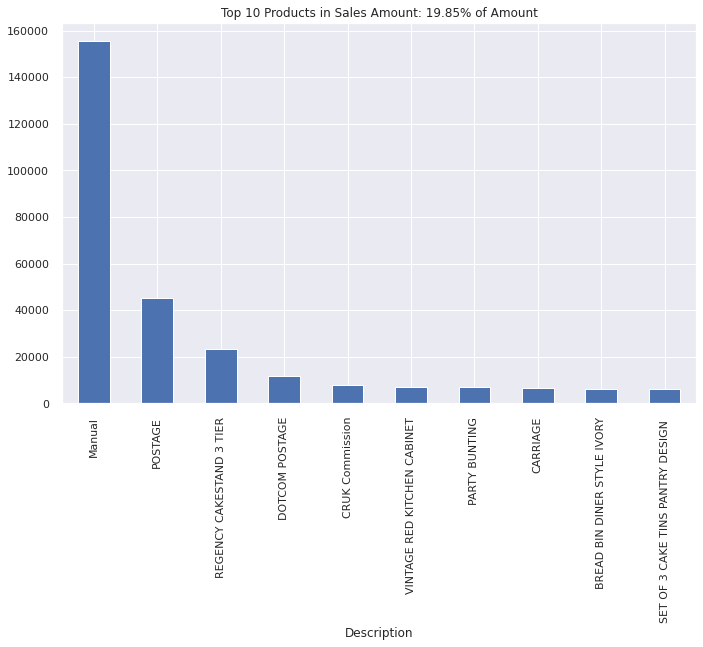

In [379]:
AmoutSum = transaction_data.groupby(["Description"]).UnitPrice.sum().sort_values(ascending = False)
inv = transaction_data[["Description", "InvoiceNo"]].groupby(["Description"]).InvoiceNo.unique().\
      agg(np.size).sort_values(ascending = False)

fig = plt.figure(figsize=(25, 7))
f1 = fig.add_subplot(121)
Top10 = list(AmoutSum[:10].index)
PercentSales =  np.round((AmoutSum[Top10].sum()/AmoutSum.sum()) * 100, 2)

g = AmoutSum[Top10].\
    plot(kind='bar', title='Top 10 Products in Sales Amount: {:3.2f}% of Amount'.\
                       format(PercentSales))

In [380]:
df_negative_qty = transaction_data[transaction_data['Quantity'] < 0]
df_negative_qty.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_amount,Month,Day,Hour
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,-27.50,12,1,9
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,-4.65,12,1,9
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80,12,1,10
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,12,1,10
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,12,1,10


In [381]:
df = transaction_data[transaction_data['Quantity'] > 0]

In [382]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_amount,Month,Day,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,1,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,1,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12,1,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,1,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,1,8
